In [8]:
"""
This Notebook has been modified and adapted from the original version provided as part of
Helen Sun's "Hands-On PyTorch Machine Learning" course published on LinkedIn Learning.

I prefer to recreate the exercise files myself rather than working directly with them because
it improves my learning comprehension.
"""
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torchvision.transforms as T
from torchvision.io import read_image

In [4]:
plt.rcParams["savefig.bbox"] = 'tight'
torch.manual_seed(1)

def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

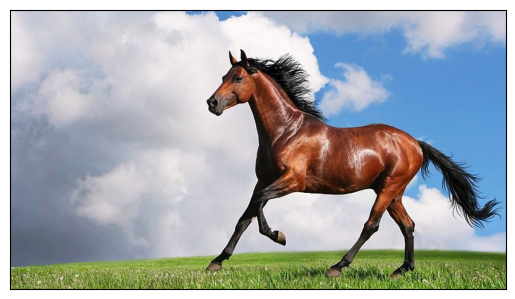

In [14]:
# Display the original horse image
orig_img = read_image(str(Path('images') / 'horse.jpg'))
horse1 = read_image(str(Path('images') / 'horse.jpg'))
horse2 = read_image(str(Path('images') / 'horse.jpg'))
show([horse1])

cuda


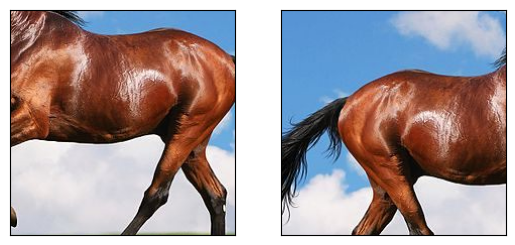

In [13]:
# Use a transform to try random cropping and horizontal flip. This type of dynamic alteration of training images
# is fairly standard practice to increase the diversity of the training data.
transforms = torch.nn.Sequential(
    T.RandomCrop(224),
    T.RandomHorizontalFlip(p=0.3),
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
horse1 = horse1.to(device)
horse2 = horse2.to(device)

transformed_horse1 = transforms(horse1)
transformed_horse2 = transforms(horse2)
show([transformed_horse1, transformed_horse2])

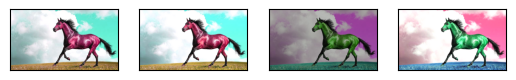

In [16]:
# Experiment with ColorJitter
jitter = T.ColorJitter(brightness=0.4, hue=0.4)
jittered_images = [jitter(orig_img) for _ in range(4)]
show(jittered_images)

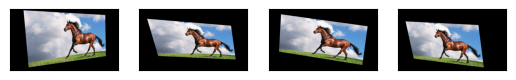

In [17]:
# Get random perspectives
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
show(perspective_imgs)

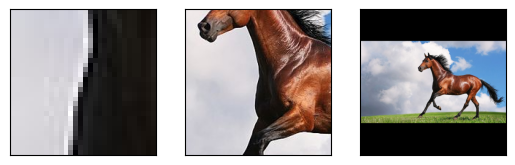

In [26]:
# Try various center crops
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (30, 200, orig_img.size(dim=2))]
show(center_crops)